# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


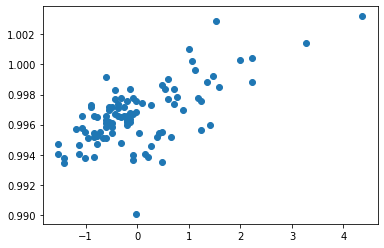

In [2]:
# reading and plotting data set x and y coordinates
dfx = pd.read_csv('./linearX.csv')
dfy = pd.read_csv('./linearY.csv')
dfx = dfx.values
dfy = dfy.values
x = dfx.reshape((-1,))
y = dfy.reshape((-1,))
x = (x-x.mean())/x.std()
plt.scatter(x,y)
plt.show()

In [3]:
# hypothesis function
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

In [4]:
# error function 
def error(x,y,theta):
    error = 0
    for i in range(x.shape[0]):
        error += (hypothesis(x[i],theta)-y[i]) ** 2
    return error

In [5]:
# gradient function
def gradient(x,y,theta):
    gradient = np.zeros((2,1))
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        gradient[0] += (hx - y[i])
        gradient[1] += (hx - y[i])*x[i]
    return gradient

In [6]:
# gradient descent function
def gradient_descent(x,y,learning_factor = 0.001):
    # initial theta
    theta = np.array([-2.0,0.0])
    max_iteration  = 100
    itr = 0
    while itr<=max_iteration:
        grad = gradient(x,y,theta)
        theta[1] -= learning_factor*grad[1]
        theta[0] -= learning_factor*grad[0]
        itr += 1
        
    final_theta = theta
    return final_theta

[0.996554  0.0013579]


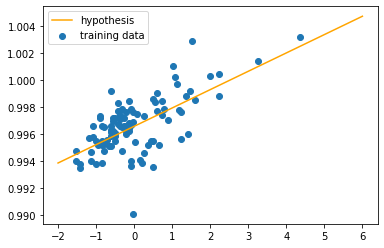

In [7]:
final_theta = gradient_descent(x,y)
print(final_theta)
# testing set
xtest = np.linspace(-2,6,10)
plt.scatter(x,y,label="training data")
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='hypothesis')
plt.legend()
plt.show()